# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow
tensorflow.__version__

'2.2.0'

#### Mounting Google drive
-  Google Colab as you can face memory issues and longer runtimes while running on local, so mounting the data is preferable.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Changing current working directory to project folder

In [ ]:
import os
path = '/content/drive/My Drive/data/'
os.chdir(path)

In [ ]:
ls

'Aligned Face Dataset from Pinterest.zip'   model-0.42.h5   model-0.81.h5
 embeddings.csv                             model-0.51.h5   model-1.18.h5
 images.npy                                 model-0.54.h5   pins/
 model-0.30.h5                              model-0.65.h5   PINS/
 model-0.35.h5                              model-0.69.h5   vgg_face_weights.h5


### Extracting the zip file from the drive.
- Extracting Aligned Face Dataset from Pinterest.zip

In [ ]:
ext_path= path + 'Aligned Face Dataset from Pinterest.zip'
from zipfile import ZipFile
with ZipFile(ext_path,'r') as z:
  z.extractall()

### Function to load images
- Defining a function to load the images from the extracted folder and map each image with person id 


In [ ]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [ ]:
metadata[1]

PINS/pins_Aaron Paul/Aaron Paul101_248.jpg

### Defining function to load image
- Defining a function to load image from the metadata

In [ ]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Loading a sample image.
- Loading one image using the function "load_image"

array([[[233, 188, 165],
        [231, 186, 163],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[232, 187, 164],
        [233, 188, 165],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[230, 186, 161],
        [228, 184, 159],
        [206, 164, 140],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       ...,

       [[198, 118,  91],
        [197, 120,  94],
        [195, 119,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[200, 120,  93],
        [200, 120,  93],
        [198, 121,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[201, 121,  94],
        [201, 121,  94],
        [199, 122,  96],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]]

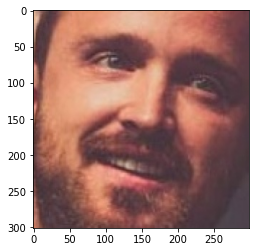

In [ ]:
import matplotlib.pyplot as plt
img1= load_image('PINS/pins_Aaron Paul/Aaron Paul0_262.jpg')
plt.imshow(img1)
img1

### VGG Face model
- The predefined model for VGG face

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Loading the model
- Loading the model defined above
- Then loading the  weight file named "vgg_face_weights.h5"

In [ ]:
w_path = path + 'vgg_face_weights.h5'
model = vgg_face()
model.load_weights(w_path)

### Get vgg_face_descriptor

In [ ]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generating embeddings for each image in the dataset
( checking for one image )

In [ ]:
# embedding vector for first image in the metadata using the pre-trained model
def embed(i):
  img_path = metadata[i].image_path()
  img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)

  img = cv2.resize(img, dsize = (224,224))
  print(img.shape)

# Obtaining embedding vector for an image
#  embedding vector for the above image using vgg_face_descriptor model and printing the shape

  embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  print(embedding_vector)
  return embedding_vector

embed(10)

(224, 224, 3)
[ 0.0256386  -0.02339509 -0.00807209 ... -0.00953565 -0.00646352
  0.00448041]


array([ 0.0256386 , -0.02339509, -0.00807209, ..., -0.00953565,
       -0.00646352,  0.00448041], dtype=float32)

so...it worked

### Generating embeddings for all images 
-  Code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, filling the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [ ]:
embeddings=[]
embeddings

[]

In [ ]:
for i in range(metadata.shape[0]):
  img=load_image(metadata[i].image_path())
  img =(img/255.).astype(np.float32)
  img=cv2.resize(img,dsize=(224,224))
  emd_vec=vgg_face_descriptor.predict(np.expand_dims(img,axis=0))[0]
  embeddings.append(emd_vec)

Saving the embeddings in google drive

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd


# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

df1 = pd.DataFrame(data=embeddings)
df1.to_csv('/content/drive/My Drive/data/embeddings.csv')
!cp embeddings.csv "drive/My Drive/"
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'embeddings.csv'})
uploaded.SetContentFile('embeddings.csv')
uploaded.Upload()


### Function to calculate distance between given 2 pairs of images.

- Considering distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

Importing the cvs from google drive

In [ ]:
import pandas as pd
df2=pd.read_csv('/content/drive/My Drive/data/embeddings.csv')

In [ ]:
df2=df2.loc[:,df2.columns!='Unnamed: 0'] #removing the extra column
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621
0,0.034977,-0.001051,-0.012489,0.025950,0.025734,0.029663,0.001556,0.016852,-0.001004,0.004343,0.017539,0.009155,0.001211,0.001153,0.016866,0.011511,0.016696,0.011853,0.015640,0.000182,0.013094,0.017112,0.014114,0.028389,0.010359,-0.003662,0.002379,0.005894,0.003022,0.009234,0.013990,-0.008210,-0.011505,0.025174,-0.002981,-0.011710,-0.013872,-0.019125,0.007538,-0.001767,...,-0.002885,-0.001586,0.006459,-0.025844,0.014013,0.008085,0.001971,-0.003494,-0.007841,0.015284,-0.006754,0.002535,0.013334,-0.019476,-0.007490,0.002605,-0.001024,-0.006439,-0.018120,-0.006551,-0.011356,0.014829,0.005325,-0.021610,0.027893,0.025127,0.007686,-0.001089,0.003087,0.007721,0.005917,0.002639,-0.002676,0.001841,0.014729,-0.017615,-0.017724,-0.010531,0.001793,0.024392
1,0.028019,-0.001126,-0.012657,0.029613,0.032462,0.023653,0.000748,0.015987,-0.010605,0.011848,0.010332,0.011344,-0.003027,-0.009949,0.011607,0.007619,0.025440,0.006785,0.017586,0.007956,0.013780,0.023929,0.013108,0.034437,0.014893,-0.000849,0.006838,0.008035,0.004798,0.002453,0.018046,-0.006049,-0.007638,0.028408,-0.007086,-0.012368,-0.014075,-0.014543,0.012765,-0.003069,...,-0.001710,-0.001339,0.004097,-0.019224,0.015050,0.021291,0.003897,0.007453,-0.003728,0.019777,-0.003359,-0.001366,0.013395,-0.019396,-0.004910,0.008467,0.001303,-0.007157,-0.015278,-0.009504,-0.005596,0.006977,0.003324,-0.015713,0.021027,0.019168,0.001814,-0.009489,0.003652,0.001833,0.001315,0.011143,0.001364,-0.004893,0.026007,-0.014651,-0.013197,-0.009047,-0.005784,0.021258
2,0.015053,-0.005032,-0.001554,0.018819,0.015880,0.027868,0.001845,0.017917,-0.003900,0.017875,0.020046,0.003761,0.006750,-0.004759,0.017447,0.001226,0.027578,0.013009,0.015919,0.003168,0.009631,0.018360,0.013848,0.013195,0.006223,0.012946,0.020418,0.011789,0.014780,0.014404,0.015537,-0.002064,-0.009413,0.025997,-0.010461,0.000057,-0.009600,-0.005584,0.004961,-0.004638,...,-0.017328,-0.006281,-0.002904,-0.013001,0.008077,0.017029,0.006195,0.007517,-0.000354,0.006638,-0.011960,-0.001012,0.011610,-0.014424,-0.010380,0.006682,-0.002700,0.010720,-0.010251,-0.005807,0.001048,0.002144,-0.000919,-0.010186,0.019899,0.015003,-0.003961,-0.012283,0.009081,0.008444,-0.001966,-0.003615,-0.006404,0.004674,0.005724,-0.012646,-0.012432,-0.005771,-0.005933,0.015859
3,0.033135,-0.005430,0.000640,0.024604,0.016253,0.018842,0.005771,0.013719,-0.003061,0.001121,0.006125,0.001070,0.011158,0.018315,0.015598,-0.002691,0.017834,0.011517,0.004708,-0.007864,-0.004359,0.015151,0.013741,0.019385,0.003488,-0.000941,0.000993,0.001557,0.011056,0.011681,0.017296,0.001442,-0.019106,0.027878,0.002836,-0.004078,-0.002075,-0.011982,0.007280,-0.006287,...,-0.015324,-0.016244,0.008263,-0.012394,0.003064,0.011619,0.003632,-0.012420,-0.006226,0.004795,-0.017437,-0.001547,0.004738,-0.015663,-0.008150,-0.007006,0.002174,-0.012311,-0.013105,-0.007115,0.001369,-0.003226,-0.003645,-0.001971,0.010057,0.013148,0.003666,-0.005816,-0.010553,0.003960,-0.006420,-0.005175,-0.015014,-0.003891,-0.001147,-0.015746,-0.017381,0.001666,-0.003030,-0.000164
4,0.043978,-0.003026,0.000511,0.028653,0.030379,0.024030,0.010657,0.010956,0.005267,0.016367,0.015487,0.007583,-0.000493,0.004571,0.024923,-0.000023,0.016096,0.002589,0.016281,-0.006266,-0.000362,0.018756,0.012250,0.018622,0.010408,0.008472,0.007224,0.002689,0.012572,0.006742,0.015928,0.013391,-0.010776,0.031896,-0.000964,0.006066,-0.010523,-0.003193,0.001886,-0.004275,...,-0.009846,-0.007666,0.025046,-0.013338,0.000251,0.013395,-0.000651,0.001739,-0.013217,0.006603,-0.026139,0.013624,0.002226,-0.021261,-0.000509,-0.009177,0.006866,0.000190,-0.009421,-0.004493,-0.000886,0.000767,0.005184,-0.020550,0.010535,0.010905,0.014019,-0.008077,-0.008

In [ ]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plotting images and getting distance between the pairs 
( liked image  will have less distance and alike image have more image )


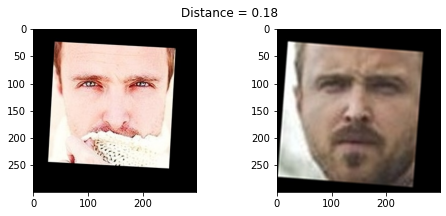

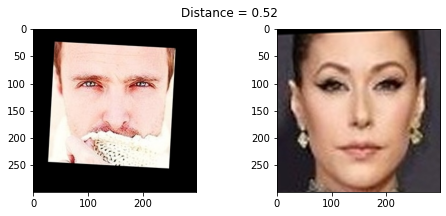

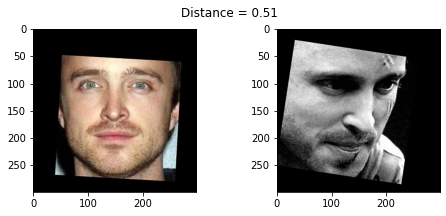

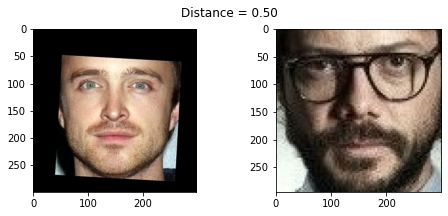

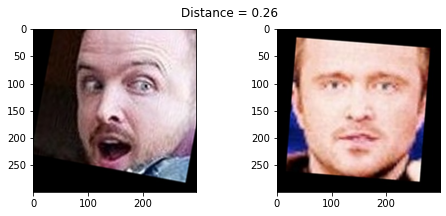

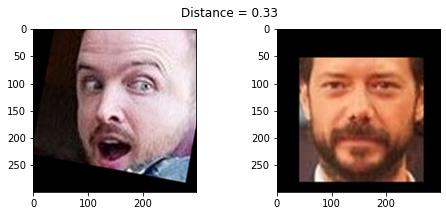

In [ ]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(df2.loc[idx1], df2.loc[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30,31)
show_pair(30,100)
show_pair(70,72)
show_pair(70,115)

### Encoding the Labels
- Encoding the targets
- By using LabelEncoder

In [ ]:
#X=embeddings
Y=metadata.astype(np.str)
Y.shape

(10770,)

Getting the Names of the person form metadata

In [ ]:
import re
Y=[re.search('PINS/pins_(.*)/(.*)',Y[i]).group(1) for i in range(Y.shape[0])]

In [ ]:
Y

['Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Paul',
 'Aaron Pa

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
Y_encoded=labelencoder.fit_transform(Y)
np.unique(Y_encoded)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

### Create train and test sets

- Using train_idx to seperate out training features and labels
- Using test_idx to seperate out testing features and labels

In [ ]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0
print(train_idx,test_idx)
X_train=df2[train_idx]   
X_test=Y_encoded[train_idx]
y_train=df2[test_idx]
y_test=Y_encoded[test_idx]
y_test

[False  True  True ...  True  True  True] [ True False False ... False False False]


(1197,)

In [ ]:
y_train.shape

(9573,)

### Standardize the feature values
- Scaling the features using StandardScaler

In [ ]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaling_x = StandardScaler()
scaling_y = StandardScaler()
X_scaled = scaling_x.fit_transform(X_train)
y_scaled = scaling_y.fit_transform(y_train)


In [ ]:
y_scaled

array([[ 2.4382945 , -0.08623622, -1.53662837, ...,  0.37461209,
        -0.38890468,  0.81796461],
       [ 3.76398025,  0.00548303, -0.77192342, ...,  1.96060908,
        -0.40310659,  0.05354359],
       [ 0.53799575, -0.38737249, -0.84675507, ...,  0.14270713,
        -0.90165449, -0.09460245],
       ...,
       [-0.28701048,  1.4357302 ,  0.05433201, ..., -0.31577019,
         0.93236855,  1.95103962],
       [ 0.79264264,  1.9821393 , -0.16091817, ..., -0.99780653,
         1.61906834,  0.80106627],
       [ 0.30592947,  0.02105839,  0.05455786, ...,  0.3627349 ,
         1.75814957,  1.1423186 ]])

In [ ]:
X_scaled

array([[ 1.80674936, -0.06712154, -1.47118013, ...,  0.50823371,
        -1.10514792,  0.5976725 ],
       [ 0.44764135, -0.39829212, -0.41711261, ...,  0.81675186,
        -1.11917166,  0.18299615],
       [ 2.34298876, -0.43206718, -0.20890164, ...,  1.51684584,
        -0.84525422, -1.04755581],
       ...,
       [-0.11780246,  0.3439301 , -1.54723227, ...,  0.01051364,
         1.23338578,  1.9595891 ],
       [-0.88817997,  0.10872671, -0.78680595, ..., -0.14679926,
         0.43513988,  1.79377647],
       [ 0.72751095,  0.93058423,  1.62439624, ..., -1.10516471,
         2.54401343,  2.71491355]])

### Reduce dimensions using PCA


In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components = 2622 )
pca.fit(X_scaled)
pca.explained_variance_

array([3.56337568e+02, 1.41570371e+02, 1.04634892e+02, ...,
       4.41083160e-06, 4.33599423e-06, 2.40939110e-07])

Text(0.5, 0, 'Eigen value')

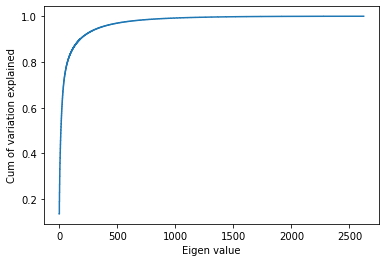

In [ ]:
plt.step(list(range(1,2623)), np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen value')

In [ ]:
pca=PCA(n_components = 18 )
pca.fit(X_scaled)
pca.explained_variance_

array([356.33756838, 141.57037082, 104.63489153,  96.60506513,
        89.16693191,  82.0532383 ,  67.93765517,  61.22658757,
        55.16416161,  50.94753573,  47.69636939,  44.64084415,
        43.50255898,  40.95367625,  37.09279548,  35.74868567,
        34.18739533,  32.14903933])

Text(0.5, 0, 'Eigen value')

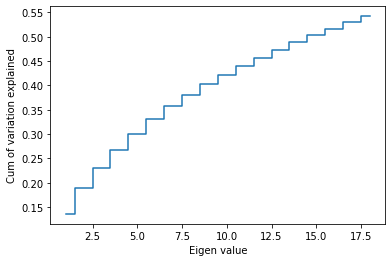

In [ ]:
plt.step(list(range(1,19)), np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen value')

In [ ]:
X_pca=pca.transform(X_scaled)
X_pca

array([[ -6.48347397,  17.22439614,  -9.3700942 , ...,  -0.06428147,
          3.52204922,  -9.29057383],
       [-17.99392212,   6.01971552,  -3.90894445, ...,   9.06978542,
         -5.51910325, -10.1509048 ],
       [-16.51414374,  -1.53027015,   0.7744414 , ...,   6.98405156,
         -4.63385997,   2.00851189],
       ...,
       [ 20.80633635, -21.4143435 , -18.06604742, ...,   2.12686848,
          3.66485082,  -0.66285624],
       [ 16.93169238, -21.72952975, -12.82130764, ...,   3.86537259,
          2.54606709,   3.83599467],
       [ 38.17950976, -18.27099026,   2.98874999, ...,  -1.70550728,
         10.23071255,   8.79338736]])

In [ ]:
pca=PCA(n_components = 18 )
pca.fit(y_scaled)
pca.explained_variance_

array([355.61848282, 139.93791827, 105.02545707,  97.78953396,
        89.86066503,  83.9632908 ,  68.22798776,  63.92320031,
        55.33667698,  50.45415872,  49.41030328,  46.26962459,
        44.57895074,  42.31286625,  39.96285364,  37.44906376,
        35.31683745,  32.17686749])

Text(0.5, 0, 'Eigen value')

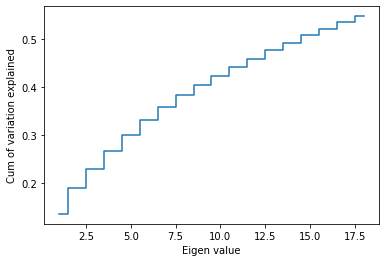

In [ ]:
plt.step(list(range(1,19)), np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen value')

In [ ]:
y_pca=pca.transform(y_scaled)
y_pca

array([[-14.1567628 ,  16.10252162, -12.1284042 , ...,   2.61244896,
         -0.07060739,   5.82059435],
       [-21.47038212,  16.6599163 ,   2.03203335, ...,  -9.1452701 ,
         -7.64383896,  -0.27980586],
       [-11.67499727,  -3.31467444,  -7.90548156, ...,  -2.99356043,
         -1.59272085,   3.65708752],
       ...,
       [ 13.38338004, -22.12434311, -11.9822376 , ...,   5.12564062,
         -1.3677331 ,   9.32450735],
       [ 18.69597194,  -1.53053852, -12.93049528, ...,   2.40991021,
         -4.56412919,   3.5760781 ],
       [ 19.08617491, -32.76081494,  -4.53412957, ...,  12.55742545,
          5.86629285,  -7.15096585]])

### Build a Classifier
- Using SVM Classifier to predict the person in the given image
- Fitting the classifier and print the score

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters={
    'C':[0.01,0.25,0.5,1],
    'kernel':['rbf','linear']
}
model=SVC()
best_svc=GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=10)
best_svc

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.25, 0.5, 1],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
best_svc.fit(X_scaled,X_test)

In [ ]:
best_svc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
from sklearn.svm import SVC
svc=SVC(C=1,kernel='rbf',random_state=1)

Predicting the image from the model trained with Reduced Dimension (PCA) gave the output with less accuracy.<br>
So training the model with Scaled data itself.

In [ ]:
svc.fit(X_scaled,X_test)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
predictt=svc.predict(y_scaled)
predictt

array([ 0,  0,  0, ..., 99, 99, 99])

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,predictt)
acc

0.960735171261487


### Testing results 

- Report to which person(folder name in dataset) the image belongs to

In [ ]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')
def identify_(example_idx):
  example_image = load_image(metadata[test_idx][example_idx].image_path())
  img =(example_image/255.).astype(np.float32)
  img=cv2.resize(img,dsize=(224,224))
  emd_vec=vgg_face_descriptor.predict(np.expand_dims(img,axis=0))
  test_scaled=scaling_x.transform(emd_vec)
  example_prediction =svc.predict(test_scaled)
  example_identity = labelencoder.inverse_transform(example_prediction)[0]
  print(example_prediction)
  print(emd_vec)
  plt.imshow(example_image)
  plt.title(f'Identified as {example_identity}');

[1]
[[ 0.00807864  0.00285403  0.01492984 ... -0.00115583  0.00341268
   0.01222776]]


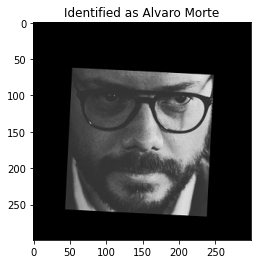

In [ ]:
identify_(10)

[17]
[[ 0.01654996  0.00430979  0.00275381 ... -0.02794298  0.00296745
   0.01113416]]


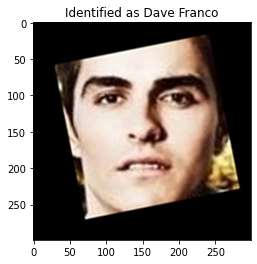

In [ ]:
identify_(200)

[63]
[[ 0.00891976  0.00405235  0.00689355 ... -0.01485175  0.00478095
   0.00783094]]


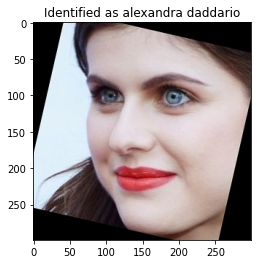

In [ ]:
identify_(748)

<h3>Thank You</h3>